# sklearn method : kde density

In [1]:
# License: BSD 3 clause

#http://scikit-learn.org/stable/auto_examples/neighbors/plot_species_kde.html#example-neighbors-plot-species-kde-py

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from sklearn.neighbors import KernelDensity

from mpl_toolkits.basemap import Basemap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [3]:


# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False
    
# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)


In [12]:
xgrid

array([-94.75, -94.7 , -94.65, ..., -34.3 , -34.25, -34.2 ])

In [13]:
ygrid

array([-56.  , -55.95, -55.9 , ...,  23.45,  23.5 ,  23.55])

In [21]:
X

array([[-94.75, -94.5 , -94.25, ..., -34.75, -34.5 , -34.25],
       [-94.75, -94.5 , -94.25, ..., -34.75, -34.5 , -34.25],
       [-94.75, -94.5 , -94.25, ..., -34.75, -34.5 , -34.25],
       ..., 
       [-94.75, -94.5 , -94.25, ..., -34.75, -34.5 , -34.25],
       [-94.75, -94.5 , -94.25, ..., -34.75, -34.5 , -34.25],
       [-94.75, -94.5 , -94.25, ..., -34.75, -34.5 , -34.25]])

In [10]:
np.unique(ytrain)

array([0, 1])

In [20]:
xy

array([[ 0.41015237, -1.35699349],
       [ 0.41015237, -1.35263017],
       [ 0.41015237, -1.33081355],
       ..., 
       [-0.97738438, -1.17809725],
       [-0.97738438, -1.17373392],
       [-0.97738438, -1.1693706 ]])

 - computing KDE in spherical coordinates
[-9999. -9999. -9999. ..., -9999. -9999. -9999.]
--------------------------------------------------------------------
[  3.51741066e-06   2.73071237e-06   1.24892380e-06 ...,   3.74575935e-54
   6.34476455e-54   1.06800439e-53]
--------------------------------------------------------------------
[[-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 ..., 
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]
 [-9999. -9999. -9999. ..., -9999. -9999. -9999.]]
--------------------------------------------------------------------
 - plot coastlines using basemap


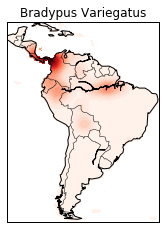

In [26]:

i=0
plt.subplot(1, 2, i + 1)

# construct a kernel density estimate of the distribution
print(" - computing KDE in spherical coordinates")
kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
kde.fit(Xtrain[ytrain == i])

# evaluate only on the land: -9999 indicates ocean
Z = -9999 + np.zeros(land_mask.shape[0])
print Z
print "--------------------------------------------------------------------"
Z[land_mask] = np.exp(kde.score_samples(xy))
print Z[land_mask]
print "--------------------------------------------------------------------"
Z = Z.reshape(X.shape)

print Z
print "--------------------------------------------------------------------"

# plot contours of the density
levels = np.linspace(0, Z.max(), 25)
plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

if basemap:
    print(" - plot coastlines using basemap")
    m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
    m.drawcoastlines()
    m.drawcountries()
else:
    print(" - plot coastlines from coverage")
    plt.contour(X, Y, land_reference,
                    levels=[-9999], colors="k",
                    linestyles="solid")
    plt.xticks([])
    plt.yticks([])

plt.title(species_names[i])

plt.show()

In [24]:
Xtrain[ytrain == i]

array([[-0.18122277, -1.1414454 ],
       [-0.18122277, -1.14115381],
       [-0.2932153 , -1.13679051],
       ..., 
       [ 0.18093304, -1.18129635],
       [ 0.18384077, -1.19351375],
       [ 0.18093304, -1.16646111]], dtype=float32)

In [ ]:
for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = -9999 + np.zeros(land_mask.shape[0])
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9999], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()

In [22]:
for i in range(2):
    print i

0
1


# test spicy

In [2]:
#http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

In [3]:
from scipy import stats

In [4]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [5]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()
print m1

[ 0.77196028  0.81128257 -0.75609813 ...,  1.40889553  1.87731329
 -1.41955309]


In [6]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

In [7]:
print values

[[ 0.77196028  0.81128257 -0.75609813 ...,  1.40889553  1.87731329
  -1.41955309]
 [ 0.11976276 -0.95405303 -1.67910521 ...,  0.29756361  1.49309401
  -1.98902912]]


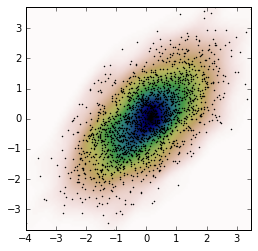

In [8]:
import matplotlib.pyplot as plt
    
fig, ax = plt.subplots()



ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
           extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])


plt.show()

# test Pirateries

In [9]:
#https://books.google.fr/books?id=yZafBAAAQBAJ&pg=PT478&lpg=PT478&dq=python+gaussian_kde+map&source=bl&ots=vVm9VRKTN3&sig=qzjhWInQId6bDJJyisCqHexDL0w&hl=fr&sa=X&ved=0ahUKEwiLovHJmeHLAhUJtxoKHfW6CyQQ6AEISzAG#v=onepage&q=python%20gaussian_kde%20map&f=false

In [62]:
df = pd.read_csv('./data/donneesBrutesPirateriesLatLon.csv',sep=';')
lons=df.longitude.values.T
lats=df.latitude.values.T

In [114]:
m = Basemap(projection='mill',
            llcrnrlon=30, llcrnrlat=-20,
            urcrnrlon=80, urcrnrlat=35,
            resolution='l')

x0,y0=m(30,-20)
x1,y1=m(80,35)

In [127]:
plt.figure(figsize=(15,10))
xm,ym=m(lons,lats)
#m.fillcontinents(color="#dbc8b2")
#m.plot(xm,ym,'.r',alpha=0.1)

In [128]:
h = np.vstack((xm, ym))
kde = stats.gaussian_kde(h)

In [143]:
k=100
tx, ty = np.meshgrid(np.linspace(x0,x1,k),np.linspace(y0,y1,k))

In [144]:
#print tx

In [145]:
v=kde(np.vstack((tx.ravel(),ty.ravel()))).reshape(k,k)

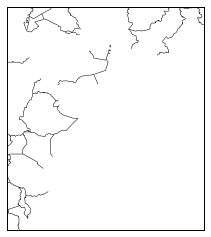

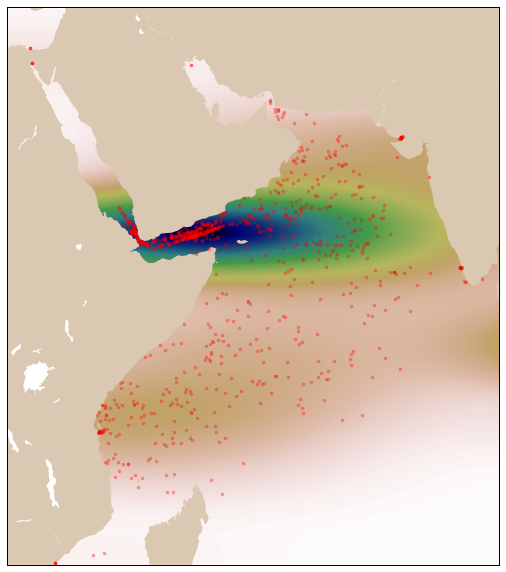

In [146]:
m.drawcountries()
plt.figure(figsize = (10,10))
#plt.figure(figsize=(15,10))
m.fillcontinents(color="#dbc8b2")
m.imshow(v,origin='lower',extent=[x0,x1,y0,y1],cmap=plt.cm.gist_earth_r)
m.plot(xm,ym,'.r',alpha=0.3)